## Surfinpy

#### Tutorial 5 -Temperature vs pressure

What is the motivation for doing this?

What questions can you answer? 

What are the thermodynamics? Maths / equations


In [2]:
from surfinpy import utils as ut
from surfinpy import bulk_mu_vs_t as bmvt
from surfinpy import data
colmap = ['#5B9BD5', '#4472C4', '#A5A5A5', '#772C24', '#ED7D31', '#FFC000', '#70AD47','#255E91', '#99ffcc']

In [3]:
temperature_range = [273, 373]

In [4]:
bulk = data.ReferenceDataSet(cation = 1, anion = 1, energy = -92.0, funits = 10, file = 'bulk_vib.yaml', entropy=True, temp_range=temperature_range)

/home/josh/anaconda3/lib/python3.8/site-packages/surfinpy-1.0.3-py3.8.egg/surfinpy/utils.py:334: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  vib_prop = yaml.load(file)


In [5]:
# MgO = data.DataSet(cation = 10, x = 0, y = 0, energy = -92.35637426, label = "Periclase", entropy = True, file = 'MgO_vib.yaml', funits = 10, temp_range=temperature_range)
# Art = data.DataSet(cation = 10, x = 5, y = 20, energy = -467.308589, label = "Artinite", entropy = True, file = 'Art_vib.yaml', funits = 5, temp_range=temperature_range)
# Bru = data.DataSet(cation = 10, x = 0, y = 10, energy = -227.3449021, label = "Brucite", entropy = True, file = 'Bru_vib.yaml', funits =  10, temp_range=temperature_range)
# Nes = data.DataSet(cation = 10, x = 10, y = 30, energy = -705.7643942, label = "Nesquehonite", entropy = True, file = 'Nes_vib.yaml', funits = 10, temp_range=temperature_range)
# Mag = data.DataSet(cation = 10, x = 10, y = 0, energy = -310.3283693, label = "Magnesite", entropy = True,  file = 'Mag_vib.yaml', funits =  10, temp_range=temperature_range)
# Lan = data.DataSet(cation = 10, x = 10, y = 50, energy = -971.8116011, label = "Lansfordite", entropy = True, file = 'Lan_vib.yaml', funits =  10, temp_range=temperature_range)
# Hyd = data.DataSet(cation = 10, x = 8, y = 10, energy = -398.6071433, label = "Hydromagnesite", entropy = True, file = 'Hyd_vib.yaml', funits =  2, temp_range=temperature_range)

In [6]:
MgO = data.DataSet(cation = 10, x = 0, y = 0, energy = -92.35637426, label = "Periclase", file = 'MgO_vib.yaml', funits = 10, temp_range=temperature_range)
Art = data.DataSet(cation = 10, x = 5, y = 20, energy = -467.308589, label = "Artinite",  file = 'Art_vib.yaml', funits = 5, temp_range=temperature_range)
Bru = data.DataSet(cation = 10, x = 0, y = 10, energy = -227.3449021, label = "Brucite",  file = 'Bru_vib.yaml', funits =  10, temp_range=temperature_range)
Nes = data.DataSet(cation = 10, x = 10, y = 30, energy = -705.7643942, label = "Nesquehonite",  file = 'Nes_vib.yaml', funits = 10, temp_range=temperature_range)
Mag = data.DataSet(cation = 10, x = 10, y = 0, energy = -310.3283693, label = "Magnesite",  file = 'Mag_vib.yaml', funits =  10, temp_range=temperature_range)
Lan = data.DataSet(cation = 10, x = 10, y = 50, energy = -971.8116011, label = "Lansfordite", file = 'Lan_vib.yaml', funits =  10, temp_range=temperature_range)
Hyd = data.DataSet(cation = 10, x = 8, y = 10, energy = -398.6071433, label = "Hydromagnesite", file = 'Hyd_vib.yaml', funits =  2, temp_range=temperature_range)

In [7]:
data = [MgO, Art, Bru, Nes, Lan, Hyd]

In [8]:
deltaX = {'Range': [ -1, 0.6],  'Label': 'CO_2'}
deltaY = {'Range': [ 273, 373], 'Label': 'Temperature'}
x_energy=-20.53412969
y_energy=-12.83725889
mu_z = 0

In [9]:
exp_x = ut.temperature_correction_range("CO2.txt", deltaY)
exp_z = ut.temperature_correction_range("H2O.txt", deltaY)

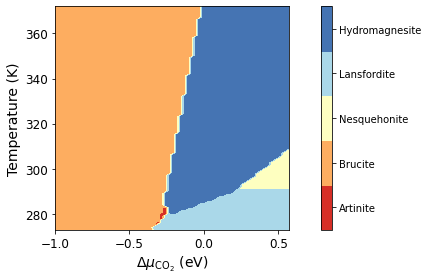

In [10]:
system = bmvt.calculate(data, bulk, deltaX, deltaY, x_energy, y_energy, mu_z, exp_x, exp_z)
system.plot_mu_vs_t(set_style="seaborn-dark-palette", colourmap="RdYlBu")

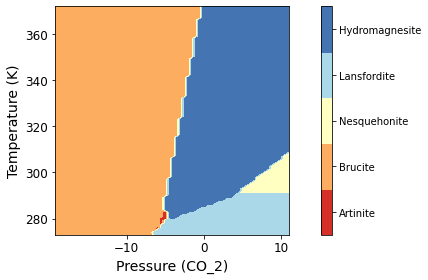

In [11]:
system.plot_p_vs_t(temperature=273, set_style="seaborn-dark-palette", colourmap="RdYlBu")

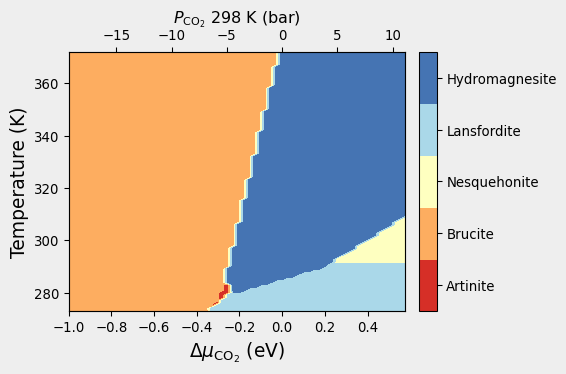

In [12]:
system.plot_mu_vs_t_vs_p(temperature=273, set_style="seaborn-dark-palette", colourmap="RdYlBu")